In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from bs4 import BeautifulSoup
from collections import defaultdict
#import requests
%matplotlib inline
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer

## remove special symbol

def clean_text(df_tem3,col):
    df_tem3[col] = df_tem3[col].str.replace("&#039;",'\'')
    df_tem3[col] = df_tem3[col].str.replace("\"","").str.lower()
    df_tem3[col] = df_tem3[col].str.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    df_tem3[col] = df_tem3[col].str.replace("\"","").str.lower()
    df_tem3[col] = df_tem3[col].str.replace( r"(\$)|(\-)|(\\)|(\s{2,})"," ")
    df_tem3[col].sample(1).iloc[0]

    stemmer = SnowballStemmer('english')
    df_tem3[col] = df_tem3[col].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split(" ")]))
    return df_tem3[col]


np.random.seed(9)

In [64]:
df = pd.read_csv("../web_scrap.csv",index_col=0).drop_duplicates()

In [65]:
nine = clean_text(df,'9')
ten = clean_text(df,'10')

In [66]:
df_tem3 = nine+' '+ten

In [67]:
#y = ((df['3'] != ' No Side Effects') & (df['3'] != ' Mild Side Effects')).astype(int)
y = (df['3'] != ' No Side Effects').astype(int)
X = df_tem3

In [68]:
y.mean()

0.7084134615384615

In [69]:
for se_com in df[((df['3'] != ' No Side Effects') & (df['3'] != ' Mild Side Effects'))]['9'].sample(20):
    print(se_com+'\n')
    print("===========================")

 i experienc a loss of libido and inabl to climax loss of appetit a good side affect in my book i lost quit a few kgs and it did wonder for my self esteem i would not recommend take this with alcohol especi someth like tequila which is an upper combin with alcohol i experienc wild abandon loss of inhibit and total chang in person i am usual quit reserv but becam quit the opposit   which sort the libido out but still unabl to climax

 diarrhea and some upset stomach

 my whole bodi ach i had sever stomachach and headach i turn into a zombi all i did was stare at the wall it would make me dizzi and at time i wouldnt know where i was at i was scare to be on it but i wasnt in my right mind to be abl to take myself off of it i took a blade one night and slash both my arm up and hid the fact that i did it i start to take myself off the medic when i was abl to think straight i admit to peopl i know what i had done to my arm other then my ankl pain i felt % better off of tramadol i believ that

In [70]:
for se_com in df[~((df['3'] != ' No Side Effects') & (df['3'] != ' Mild Side Effects'))]['9'].sample(20):
    print(se_com+'\n')
    print("===========================")

 none  one of the first time a bipolar medic has not caus side effect for me

 fatigu and possibl water retent i nor my doctor monitor water retent or weight gain but i am fair self awar the doctor did mention possibl fatigu andor nausea

 none

 insomnia the first week

 when you spray it in your nostril your mouth will have a horrid tast but doe not last long

 there were no side effect for me

 increas urin output potassium deficit

 none at all the person who previous review had an allerg reaction that doe not mean the drug doesnt work that mean she simpli cant toler the medic 

 peel which can chafe the skin and interf with put on face makeup howev i have built up such a toler i would have to appli retin a  time daili to achiev major peel it is hard to measur the anti age effect as i dont know what i would look like without have use retin a 

 dri skin and slight skin pigment

 initi when the dosag given to me was too high i becam a littl jitteri if the doctor prescrib the right d

In [71]:
# Split Training & Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [72]:
import tensorflow as tf
import tensorflow 

#from tensorflow import tensorflow.keras

#from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional



# fix random seed for reproducibility

MAX_NB_WORDS = 500
max_review_length = 500
EMBEDDING_DIM = 160


In [73]:
# Tokenize the data
tokenizer = Tokenizer(num_words = MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True, split=' ', char_level=False, 
                      oov_token=None, document_count=0)

tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# truncate and pad input sequences
X_train = sequence.pad_sequences(train_sequences, maxlen=max_review_length)
X_test = sequence.pad_sequences(test_sequences, maxlen = max_review_length)

word_index = tokenizer.word_index

In [74]:
nb_words  = min(MAX_NB_WORDS, len(word_index))
lstm_out = max_review_length

model = Sequential()
model.add(Embedding(nb_words,EMBEDDING_DIM,input_length=max_review_length))
#model.add(Dropout(0.2))

## add conv using kernal No.32 and size 3x3, actiation='relu'(rm neg)
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool1D(pool_size=2))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
#model.add(Attention(max_review_length))
model.add(Dense(1, activation = 'sigmoid'))

## one-code mutiple categories targets use 'categorical_crossentropy' not 'binary_crossentropy'
model.compile(loss='binary_crossentropy',optimizer='adam',metrics =['accuracy'])

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 160)          80000     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 500, 40)           28960     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 41        
Total params: 118,761
Trainable params: 118,761
Non-trainable params: 0
_________________________________________________________________


In [76]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Run LSTM Model
batch = 32 
epoch = 40

early_stopping = EarlyStopping(patience = 3)

LSTM_model = model.fit(X_train, y_train, batch_size=batch, epochs=epoch,
                       validation_split=0.2,callbacks=[early_stopping], shuffle = True)

best_score = min(LSTM_model.history['val_loss'])

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2662 samples, validate on 666 samples
Epoch 1/40
2662/2662 [==============================] - 59s 22ms/step - loss: 0.5955 - acc: 0.7096 - val_loss: 0.5467 - val_acc: 0.7327
Epoch 2/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.4583 - acc: 0.8050 - val_loss: 0.5317 - val_acc: 0.7793
Epoch 3/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.3741 - acc: 0.8644 - val_loss: 0.4251 - val_acc: 0.8303
Epoch 4/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.3025 - acc: 0.8971 - val_loss: 0.3605 - val_acc: 0.8754
Epoch 5/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.3104 - acc: 0.8884 - val_loss: 0.4927 - val_acc: 0.7868
Epoch 6/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.3948 - acc: 0.8546 - val_loss: 0.4739 - val_acc: 0.8183
Epoch 7/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.3380 - acc: 0.8835 - val_loss: 0.3583 - val_acc: 0.8859
E

In [77]:
LSTM_model_history = pd.DataFrame(LSTM_model.history)
file_name = "web_20_bilstm_2layer_se_nor_comm.csv"
LSTM_model_history.to_csv( file_name)

In [78]:
print(LSTM_model_history)

         acc      loss   val_acc  val_loss
0   0.709617  0.595483  0.732733  0.546747
1   0.805034  0.458294  0.779279  0.531657
2   0.864388  0.374122  0.830330  0.425054
3   0.897070  0.302548  0.875375  0.360508
4   0.888430  0.310358  0.786787  0.492679
5   0.854621  0.394810  0.818318  0.473903
6   0.883546  0.337950  0.885886  0.358254
7   0.900075  0.305968  0.818318  0.462464
8   0.853869  0.364907  0.867868  0.362638
9   0.893689  0.304204  0.885886  0.353354
10  0.913599  0.269339  0.885886  0.364106
11  0.916980  0.255093  0.876877  0.372487
12  0.924493  0.234042  0.878378  0.371929


In [79]:
#model.save("web_20_bilstm_2layer.h5")

Text(0.5,0,'epoch')

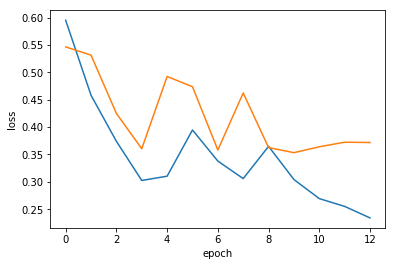

In [80]:
plt.plot(LSTM_model.history['loss'],label='train')
plt.plot(LSTM_model.history['val_loss'],label='validation')
plt.ylabel("loss")
plt.xlabel("epoch")

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model
#model = load_model("web_20_bilstm_2layer.h5")
#LSTM_model = model.fit(X_train, y_train, batch_size=batch, epochs=epoch)

accr = model.evaluate(X_test,y_test, batch_size = 100)
accr

832/832 [==============================] - 2s 2ms/step


[0.3584920780446667, 0.8834134486432259]

In [82]:
#             acc      loss   val_acc  val_loss
#     0  0.670173  0.597171  0.770270  0.465685
#     1  0.800902  0.425928  0.779279  0.446773
#     2  0.849737  0.355651  0.794294  0.434360
#     3  0.869647  0.318369  0.800300  0.442692
#     4  0.886927  0.287467  0.801802  0.473488
#     5  0.900826  0.256769  0.792793  0.538440

#     [0.9755449504233323, 0.6394230763499553]

#     array([[373, 133],
#            [167, 159]])

In [83]:
y_test_pred = model.predict_classes(X_test)
confusion_matrix(y_test,y_test_pred)

array([[186,  59],
       [ 38, 549]])

In [84]:
y_test_pro = model.predict_proba(X_test)

0.8889163161005458


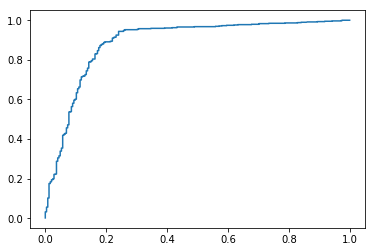

In [85]:
from sklearn.metrics import roc_auc_score, roc_curve
print(roc_auc_score(y_test,y_test_pro))
fpr, tpr, thre = roc_curve(y_test,y_test_pro)

plt.plot(fpr,tpr)

In [86]:
roc_curve(y_test,y_test_pro)

(array([0.        , 0.        , 0.00408163, 0.00408163, 0.00816327,
        0.00816327, 0.00816327, 0.0122449 , 0.0122449 , 0.01632653,
        0.01632653, 0.02040816, 0.02040816, 0.0244898 , 0.0244898 ,
        0.02857143, 0.02857143, 0.03265306, 0.03265306, 0.03673469,
        0.03673469, 0.04081633, 0.04081633, 0.04489796, 0.04489796,
        0.04897959, 0.04897959, 0.05306122, 0.05306122, 0.05714286,
        0.05714286, 0.05714286, 0.05714286, 0.06122449, 0.06122449,
        0.06530612, 0.06530612, 0.06938776, 0.06938776, 0.07346939,
        0.07346939, 0.07755102, 0.07755102, 0.08163265, 0.08163265,
        0.08571429, 0.08571429, 0.08979592, 0.08979592, 0.09387755,
        0.09387755, 0.09795918, 0.09795918, 0.10204082, 0.10204082,
        0.10612245, 0.10612245, 0.11020408, 0.11020408, 0.11428571,
        0.11428571, 0.11836735, 0.11836735, 0.12244898, 0.12244898,
        0.12653061, 0.12653061, 0.13061224, 0.13061224, 0.13469388,
        0.13469388, 0.13877551, 0.13877551, 0.14

## predict sentence

In [39]:
first_quest2 = pd.read_csv("../wit_ai_sentment/SE_tem_l400_first_request.ccv",index_col=0)

In [40]:
y_wit = ((first_quest2['value'] == "negative")).astype(int)
X_wit = clean_text(first_quest2,'text')

In [41]:
X_wit_sequences = tokenizer.texts_to_sequences(X_wit)
X_wit_trans = sequence.pad_sequences(X_wit_sequences, maxlen = max_review_length)


In [42]:
accr = model.evaluate(X_wit_trans,y_wit, batch_size = 100)
accr

30689/30689 [==============================] - 71s 2ms/step


[0.8701280017469188, 0.585421484560595]

In [43]:
y_test_pred = model.predict_classes(X_wit_trans)
confusion_matrix(y_wit,y_test_pred)

array([[8878, 5046],
       [7677, 9088]])

In [44]:
## [1.620907984605271, 0.5002443838369665]
## array([[11736,  2188],
##       [13149,  3616]])

In [45]:
for sen in X_wit[y_test_pred.flatten() == 1].sample(10):
    print(sen+"\n")
    print("==================================")

at first it was great i didnt have ani side effect except for mood swing now and then

first month is fine i dont get my period or ani bleed or ani other side effect

i had a regular period prior to get it but due to my daili medic the side effect was no period

the onli side effect ive had is slight nausea the first week i start take them

i was curious about the side effect and want to see if it could help out with my focus

i had a lot of start up side effect most notabl increas anxieti lack of appetit wake up with panic attack and just feel like crap

after read onlin about all the side effect recal and bad experi   i decid to put it asid

same drug but a slow releas total clear up the side effect

i am almost two week into take them and to my relief i have not suffer ani bad side effect but it still earli

yes there are some side effect for me insomnia but i dont know if that is flagyl or bactrim but it is so much better than lose my finger



In [46]:
## 8/10(7.5/10)

In [47]:
for sen in X_wit[y_test_pred.flatten() == 0].sample(10):
    print(sen+"\n")
    print("==================================")

the onli side effect i am find is hair loss i check side effect for eliqui but hair loss was not on the list

though i had no side effect my daughter tri it and told me that she had contempl suicid so she stop use it immedi and all was well we did discov later that she had add which may have contribut to the side effect

this was a life changer with benefit and no side effect

i havent had ani notic negat side effect but i dont like that i washav been on such a power antibiot for so long

i like it but wont be recommend it due to sexual and other side effect

i did not experi ani serious side effect except some tired space out feel and on the nd day i did feel veri down not sure if that was becaus of the medic

i had no pain urgenc or side effect just a natur urg to go the onli negat side effect i had was painless gas

fewer side effect  unfortun the one side effect it did caus is pretti debilit in my case

my negat side effect were complet my own fault as i did not watch what i ate on

In [48]:
## 5/10 (5.5/10)

## predict comments with wit lableled

In [49]:
drugsComTrain = pd.read_csv('../drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)#.sample(40000)


In [50]:
first_quest3 = pd.merge(first_quest2,drugsComTrain,left_index=True,right_index=True,how='left')
y_wit = ((first_quest3['value'] == "negative")).astype(int)
X_wit = clean_text(first_quest3,'review')

In [51]:
X_wit_sequences = tokenizer.texts_to_sequences(X_wit)
X_wit_trans = sequence.pad_sequences(X_wit_sequences, maxlen = max_review_length)

accr = model.evaluate(X_wit_trans,y_wit, batch_size = 100)
accr

30689/30689 [==============================] - 70s 2ms/step


[1.01989377620357, 0.5524780831323302]

In [52]:
y_test_pred = model.predict_classes(X_wit_trans)
confusion_matrix(y_wit,y_test_pred)

array([[ 3084, 10840],
       [ 2894, 13871]])

In [53]:
for sen in X_wit[y_test_pred.flatten() == 1].sample(10):
    print(sen+"\n")
    print("==================================")

one shot month later side effectsoverlook some as fibromyalgia illsbut when jaw ach and teeth loosenedno more the withdraw or is still side effect make me want to go to er

wow read all the comment make me realis i am not alon had mine sinc may the th small side effect sore breast a bit tire week with no bleed then sinc the of may no stop my period use to be veri heav to day straight but with the implant i wear onli small pad i cant complain that much about the bleed no major side effect we are all differ and i am go to give it more chanc i use to wear big pad dure my period you could see the shape on my trouser but now it light and no babi i think i could give it month trial

on for month work well so i did not take as much insulin   had one yeast infect that stop after fluconazol i did not lose weight despit eat better with this major side effect of hair loss so i am stop   my number were fine befor this and the hair loss and crappi textur is so not worth itdoctor never mention hair 

In [54]:
## 8/10(7.5/10)

In [55]:
for sen in X_wit[y_test_pred.flatten() == 0].sample(10):
    print(sen+"\n")
    print("==================================")

my experi was horribl side effect it didnt help my pain much and certain didnt shrink my endometriosi got my last month in now sinc i have suffer sever pain in my joint and bone i wouldnt recommend this drug to ani endo girl

i will be get th shot next wk thus far i have had no side effect my dexa can show some improv i hope continu as i have had numer broken bone an would be grate for it to work

best otc medicin avail with the least side effect mayb a littl sleepi great to take travel

it is earli day yet under one month sinc i commenc treatment with questran but there has been mark decreas in daili bowel activ i have had crohn for the past year and all other medic have prove to be larg ineffect i have been concern about the potenti danger side effect that some medicin that are prescrib for this condit may have sinc start this cours of treatment my intak of codein and lomotilimodium has been minim while constip has occur it has been manag without go down this track with four identifi

In [56]:
# 7/10

## predict comments without wit lableled

In [57]:
test = pd.read_csv("../drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
X_wit = clean_text(test,'review')

In [58]:
X_wit_sequences = tokenizer.texts_to_sequences(X_wit)
X_wit_trans = sequence.pad_sequences(X_wit_sequences, maxlen = max_review_length)

In [59]:
y_test_pred = model.predict_classes(X_wit_trans)

In [60]:
for sen in X_wit[y_test_pred.flatten() == 1].sample(10):
    print(sen+"\n")
    print("==================================")

i was first prescrib this for asperg syndrom at the age of ive been on numer type of medic sinc i was a teenag but this is the first one that ive been on that has signific help my qualiti of life is much better i dont have as mani rumin obsess thought that make me miser

hot flash throughout the day moodi and moder depress and moder fatigu

i start use this product about a month ago and i start see result immedi i suffer from coars chin hair and would often get ingrown hair that led to scar from constant tweez and irrit i barley have to tweez anymor and when i do the hair are thin and come out veri easi i do not know if this product has skin lighten agent in it but i have also notic that my scar has fade as well after suffer for year and not be abl to leav the hous without make up i am happi to say that becaus of this product i am start g to feel confid in my own skin again i absolut would recommend this product to anyon who could use it i am consist with appli twice a day and am veri 

In [61]:
for sen in X_wit[y_test_pred.flatten() == 0].sample(10):
    print(sen+"\n")
    print("==================================")

been take zomig for about a year for common migrain without aura i think i never know if a serious migrain is come on but zomig seem to work for it all i break the mg pill in half at first if it not bad then take a whole mg pill if i wake up to a headach the next day my headach use to last  day switch side imetrex seem to work but it made my arm and chest feel heavi zomig has less side effect and seem to work just as well i do have a few side effect but i associ them with relief so they dont realli bother me a pill will put me out and ill sleep realli well my skin get sensit to temperatur shower will sting a littl and as soon as the headach subsid ill feel a littl euphor

hi there can somebodi pleas help me as ive been on citalopram mg for day now do feel a littl bit better but not there yet i want to be my self again as ive got no control over my mind feel like im go crazi can some bodi pleas let me know

it work and no side effect that i notic

honest everi woman is differ i am curre

In [62]:
## 7/10 (6.5/10)